In [1]:
%pylab inline
from pymetis import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Create CRS matrix for Poisson problem in unit square:
n   = 256
n2  = n * n
nnz = n2 + 4 * (n - 2) * (n - 2)

ptr = np.zeros(n2 + 1, dtype = np.int32)
col = np.zeros(nnz,    dtype = np.int32)

bnd = (0, n-1)

col_stencil = np.array([-n, -1,  0,  1,  n])

idx  = 0
head = 0

for i in range(0, n):
    for j in range(0, n):
        if i in bnd or j in bnd:
            col[head] = idx
            head += 1
        else:
            col[head:head+5] = col_stencil + idx
            head += 5

        idx += 1
        ptr[idx] = head

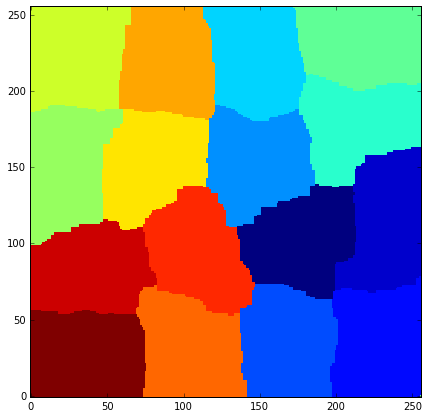

In [3]:
# Partition domain
part = partition(16, 1, ptr, col).reshape((n,n))

# Plot partition
figure(num=1, figsize=(16,7))
imshow(part, origin='lower', interpolation='nearest');